In [14]:
import requests as rq
import json as js
import pandas as pd

In [15]:
data = rq.get('https://data.austintexas.gov/resource/9t4d-g238.json').text

In [16]:
Dict = js.loads(data)

In [17]:
#print(Dict)
df = pd.DataFrame(Dict)

In [19]:
df

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A860409,Zeus,2022-10-18T08:17:00.000,2022-10-18T08:17:00.000,2009-06-28T00:00:00.000,Adoption,Foster,Dog,Neutered Male,13 years,German Shepherd,Brown/Black
1,A864356,Kimba,2022-10-18T07:08:00.000,2022-10-18T07:08:00.000,2021-03-24T00:00:00.000,Adoption,Foster,Dog,Spayed Female,1 year,Labrador Retriever Mix,Black/White
2,A867262,NaN,2022-10-18T00:00:00.000,2022-10-18T00:00:00.000,2021-10-14T00:00:00.000,Died,Emergency,Cat,Intact Female,1 year,Domestic Shorthair,White/Orange Tabby
3,A866988,NaN,2022-10-17T19:16:00.000,2022-10-17T19:16:00.000,2022-08-04T00:00:00.000,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Medium Hair,Blue
4,A865121,*Winona,2022-10-17T19:01:00.000,2022-10-17T19:01:00.000,2022-04-06T00:00:00.000,Adoption,NaN,Dog,Spayed Female,6 months,Siberian Husky,White/Black
...,...,...,...,...,...,...,...,...,...,...,...,...
995,A862138,*Gandalf,2022-09-15T10:34:00.000,2022-09-15T10:34:00.000,2022-07-07T00:00:00.000,Adoption,Foster,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Blue
996,A863472,*Cuddles,2022-09-15T10:31:00.000,2022-09-15T10:31:00.000,2022-07-04T00:00:00.000,Adoption,Foster,Cat,Neutered Male,2 months,Domestic Shorthair,Black/White
997,A862137,*Sissy,2022-09-15T10:24:00.000,2022-09-15T10:24:00.000,2022-07-07T00:00:00.000,Adoption,Foster,Cat,Spayed Female,2 months,Domestic Shorthair Mix,Blue Tabby
998,A864859,Yaboi,2022-09-15T10:06:00.000,2022-09-15T10:06:00.000,2020-09-01T00:00:00.000,Died,In Surgery,Dog,Intact Male,2 years,Alaskan Malamute,Black/White


In [20]:
df.isna().sum()

animal_id             0
name                156
datetime              0
monthyear             0
date_of_birth         0
outcome_type          1
outcome_subtype     563
animal_type           0
sex_upon_outcome      0
age_upon_outcome      0
breed                 0
color                 0
dtype: int64

In [28]:
df2 = df.copy()
df2['name'] = df2['name'].fillna('Unregistered')
df2[['outcome_type','outcome_subtype']] = df2[['outcome_type','outcome_subtype']].fillna('Unknown')
df2

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A860409,Zeus,2022-10-18T08:17:00.000,2022-10-18T08:17:00.000,2009-06-28T00:00:00.000,Adoption,Foster,Dog,Neutered Male,13 years,German Shepherd,Brown/Black
1,A864356,Kimba,2022-10-18T07:08:00.000,2022-10-18T07:08:00.000,2021-03-24T00:00:00.000,Adoption,Foster,Dog,Spayed Female,1 year,Labrador Retriever Mix,Black/White
2,A867262,Unregistered,2022-10-18T00:00:00.000,2022-10-18T00:00:00.000,2021-10-14T00:00:00.000,Died,Emergency,Cat,Intact Female,1 year,Domestic Shorthair,White/Orange Tabby
3,A866988,Unregistered,2022-10-17T19:16:00.000,2022-10-17T19:16:00.000,2022-08-04T00:00:00.000,Adoption,Unknown,Cat,Neutered Male,2 months,Domestic Medium Hair,Blue
4,A865121,*Winona,2022-10-17T19:01:00.000,2022-10-17T19:01:00.000,2022-04-06T00:00:00.000,Adoption,Unknown,Dog,Spayed Female,6 months,Siberian Husky,White/Black
...,...,...,...,...,...,...,...,...,...,...,...,...
995,A862138,*Gandalf,2022-09-15T10:34:00.000,2022-09-15T10:34:00.000,2022-07-07T00:00:00.000,Adoption,Foster,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Blue
996,A863472,*Cuddles,2022-09-15T10:31:00.000,2022-09-15T10:31:00.000,2022-07-04T00:00:00.000,Adoption,Foster,Cat,Neutered Male,2 months,Domestic Shorthair,Black/White
997,A862137,*Sissy,2022-09-15T10:24:00.000,2022-09-15T10:24:00.000,2022-07-07T00:00:00.000,Adoption,Foster,Cat,Spayed Female,2 months,Domestic Shorthair Mix,Blue Tabby
998,A864859,Yaboi,2022-09-15T10:06:00.000,2022-09-15T10:06:00.000,2020-09-01T00:00:00.000,Died,In Surgery,Dog,Intact Male,2 years,Alaskan Malamute,Black/White


In [30]:
df2['name'] = df2['name'].str.replace('*', '', regex=True)
df2

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A860409,Zeus,2022-10-18T08:17:00.000,2022-10-18T08:17:00.000,2009-06-28T00:00:00.000,Adoption,Foster,Dog,Neutered Male,13 years,German Shepherd,Brown/Black
1,A864356,Kimba,2022-10-18T07:08:00.000,2022-10-18T07:08:00.000,2021-03-24T00:00:00.000,Adoption,Foster,Dog,Spayed Female,1 year,Labrador Retriever Mix,Black/White
2,A867262,Unregistered,2022-10-18T00:00:00.000,2022-10-18T00:00:00.000,2021-10-14T00:00:00.000,Died,Emergency,Cat,Intact Female,1 year,Domestic Shorthair,White/Orange Tabby
3,A866988,Unregistered,2022-10-17T19:16:00.000,2022-10-17T19:16:00.000,2022-08-04T00:00:00.000,Adoption,Unknown,Cat,Neutered Male,2 months,Domestic Medium Hair,Blue
4,A865121,Winona,2022-10-17T19:01:00.000,2022-10-17T19:01:00.000,2022-04-06T00:00:00.000,Adoption,Unknown,Dog,Spayed Female,6 months,Siberian Husky,White/Black
...,...,...,...,...,...,...,...,...,...,...,...,...
995,A862138,Gandalf,2022-09-15T10:34:00.000,2022-09-15T10:34:00.000,2022-07-07T00:00:00.000,Adoption,Foster,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Blue
996,A863472,Cuddles,2022-09-15T10:31:00.000,2022-09-15T10:31:00.000,2022-07-04T00:00:00.000,Adoption,Foster,Cat,Neutered Male,2 months,Domestic Shorthair,Black/White
997,A862137,Sissy,2022-09-15T10:24:00.000,2022-09-15T10:24:00.000,2022-07-07T00:00:00.000,Adoption,Foster,Cat,Spayed Female,2 months,Domestic Shorthair Mix,Blue Tabby
998,A864859,Yaboi,2022-09-15T10:06:00.000,2022-09-15T10:06:00.000,2020-09-01T00:00:00.000,Died,In Surgery,Dog,Intact Male,2 years,Alaskan Malamute,Black/White


<AxesSubplot:>

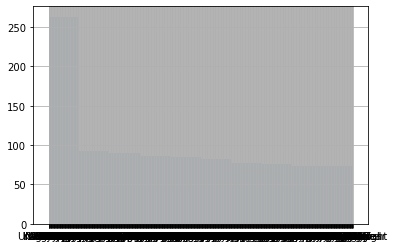

In [33]:
df2['name'].hist()